In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import plotly.offline as py
import plotly.graph_objs as go


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv("drive/MyDrive/Trabalho IA/Iris.csv") #se o separador entre cada coluna for diferente de ',', então teria que especificar comoum parâmetro

print(data)

Mounted at /content/drive
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
.

In [ ]:
# Função para chamada do gráfico interativo

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.43.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data["Sepal_Petal_Length"] = data["SepalLengthCm"] / data["PetalLengthCm"]
data["Sepal_Petal_Width"] = data["SepalWidthCm"] / data["PetalWidthCm"]

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_Petal_Length,Sepal_Petal_Width
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.642857,17.500000
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.500000,15.000000
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.615385,16.000000
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.066667,15.500000
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.571429,18.000000
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.288462,1.304348
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.260000,1.315789
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1.250000,1.500000
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1.148148,1.478261


In [ ]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data['SpeciesCat']=data.Species.astype('category').cat.codes

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_Petal_Length,Sepal_Petal_Width,SpeciesCat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.642857,17.500000,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.500000,15.000000,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.615385,16.000000,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.066667,15.500000,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.571429,18.000000,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.288462,1.304348,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.260000,1.315789,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1.250000,1.500000,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1.148148,1.478261,2


In [ ]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Sepal_Petal_Length,Sepal_Petal_Width,SpeciesCat
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,-0.828586,-0.724318,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,-0.698962,-0.641933,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,0.588486,0.504290,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,-0.934778,-0.812513,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,-0.896479,-0.814635,0.956464
Sepal_Petal_Length,-0.828586,-0.698962,0.588486,-0.934778,-0.896479,1.000000,0.851654,-0.878254
Sepal_Petal_Width,-0.724318,-0.641933,0.504290,-0.812513,-0.814635,0.851654,1.000000,-0.763462
SpeciesCat,0.942830,0.782561,-0.419446,0.949043,0.956464,-0.878254,-0.763462,1.000000


<AxesSubplot:>

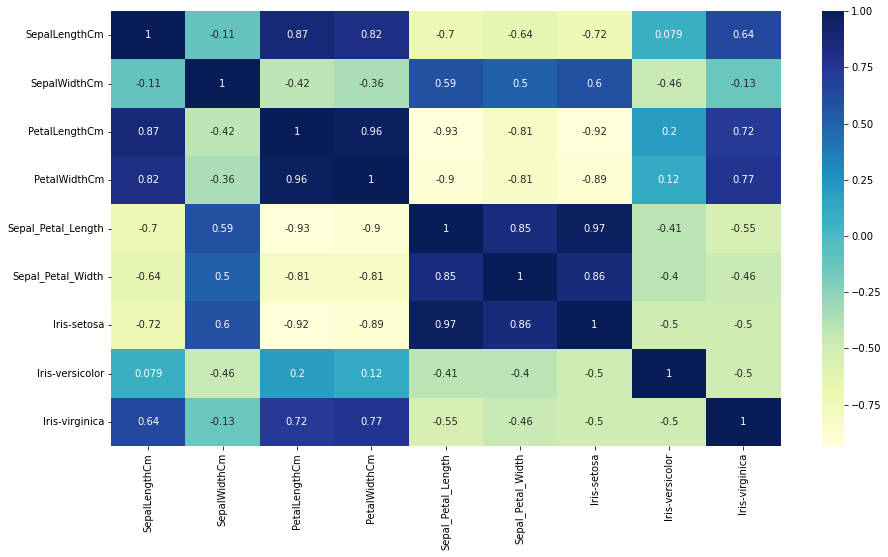

In [ ]:
dataToCorr = data.drop(["Id"], axis=1)
dataToCorr = dataToCorr.drop(["SpeciesCat"], axis=1)
dataToCorr = dataToCorr.join(pd.get_dummies(dataToCorr.Species))
plt.figure(figsize=(15, 8))
sns.heatmap(dataToCorr.corr(), annot=True, cmap="YlGnBu")

In [ ]:
data['SpeciesCat']=data.Species.astype('category').cat.codes

In [ ]:
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y = data[["SpeciesCat"]]
Y

,SpeciesCat
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


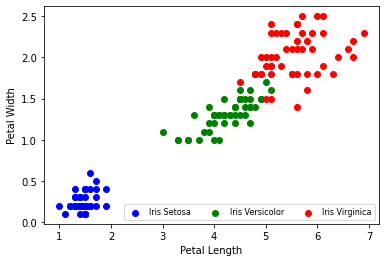

In [ ]:
dataCat0 = data[data["SpeciesCat"] == 0]
dataCat0
X_0 = dataCat0[["PetalLengthCm"]]
Y_0 = dataCat0[["PetalWidthCm"]]

dataCat1 = data[data["SpeciesCat"] == 1]
dataCat1

X_1 = dataCat1[["PetalLengthCm"]]
Y_1 = dataCat1[["PetalWidthCm"]]


dataCat2 = data[data["SpeciesCat"] == 2]
dataCat2

X_2 = dataCat2[["PetalLengthCm"]]
Y_2 = dataCat2[["PetalWidthCm"]]

plt0 = plt.scatter(X_0, Y_0, c ="blue", label="Iris Setosa")
plt1 = plt.scatter(X_1, Y_1, c ="green", label="Iris Versicolor")
plt2 = plt.scatter(X_2, Y_2, c ="red", label="Iris Virginica")

plt.legend((plt0, plt1, plt2),
           ('Iris Setosa', 'Iris Versicolor', 'Iris Virginica'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

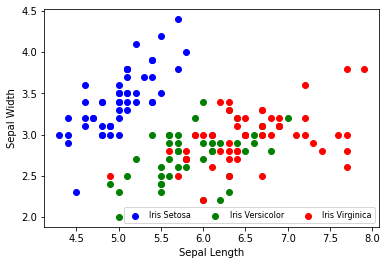

In [ ]:
dataCat0 = data[data["SpeciesCat"] == 0]
dataCat0
X_0 = dataCat0[["SepalLengthCm"]]
Y_0 = dataCat0[["SepalWidthCm"]]

dataCat1 = data[data["SpeciesCat"] == 1]
dataCat1

X_1 = dataCat1[["SepalLengthCm"]]
Y_1 = dataCat1[["SepalWidthCm"]]


dataCat2 = data[data["SpeciesCat"] == 2]
dataCat2

X_2 = dataCat2[["SepalLengthCm"]]
Y_2 = dataCat2[["SepalWidthCm"]]

plt0 = plt.scatter(X_0, Y_0, c ="blue", label="Iris Setosa")
plt1 = plt.scatter(X_1, Y_1, c ="green", label="Iris Versicolor")
plt2 = plt.scatter(X_2, Y_2, c ="red", label="Iris Virginica")

plt.legend((plt0, plt1, plt2),
           ('Iris Setosa', 'Iris Versicolor', 'Iris Virginica'),
           scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=8)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

**Dividindo dataset em 2 partes - 70% para treino e 30% para teste**

In [ ]:
# O tamanho da base de teste será de 30%, enquanto que a base de treino terá 70%
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)


**Realizando normalização dos dados**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
columns_X_train = X_train.keys()
columns_X_test = X_test.keys()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns_X_train)
X_test = pd.DataFrame(X_test, columns=columns_X_test)
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.083333,0.636364,0.070175,0.083333
1,0.194444,0.454545,0.105263,0.041667
2,0.222222,0.772727,0.087719,0.125000
3,0.416667,0.272727,0.526316,0.458333
4,0.166667,0.500000,0.087719,0.000000
...,...,...,...,...
100,0.555556,0.136364,0.596491,0.500000
101,0.555556,0.409091,0.807018,0.708333
102,0.416667,0.318182,0.543860,0.375000
103,0.138889,0.636364,0.157895,0.041667


In [ ]:
def printMetrics(Y_test_pm, Predicted_pm):
  rf1_pm = f1_score(Y_test_pm, Predicted_pm, average = 'macro')
  rP_pm  = precision_score(Y_test_pm, Predicted_pm, average = 'macro')
  rr_pm = recall_score(Y_test_pm, Predicted_pm, average = 'macro')
  print("F1 Score: " + str(rf1_pm))
  print("Precision: " + str(rP_pm))
  print("Recall: " + str(rr_pm))

In [ ]:
Y_train

,SpeciesCat
6,0
25,0
21,0
92,1
9,0
...,...
87,1
103,2
67,1
24,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  105 non-null    float64
 1   SepalWidthCm   105 non-null    float64
 2   PetalLengthCm  105 non-null    float64
 3   PetalWidthCm   105 non-null    float64
dtypes: float64(4)
memory usage: 3.4 KB


In [ ]:
acc_test = []

**Prevendo valores com Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)
lr.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(max_iter=300)

In [ ]:
LRScore = lr.score(X_test, Y_test)
acc_test.append(LRScore)
LRScore

0.9333333333333333

In [ ]:
LRY_pred = lr.predict(X_test)
LRY_pred

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0], dtype=int8)

In [ ]:
printMetrics(Y_test, LRY_pred)

F1 Score: 0.9279503105590061
Precision: 0.9248366013071895
Recall: 0.9326599326599326


In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_Petal_Length,Sepal_Petal_Width,SpeciesCat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,3.642857,17.500000,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,3.500000,15.000000,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,3.615385,16.000000,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,3.066667,15.500000,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,3.571429,18.000000,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1.288462,1.304348,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1.260000,1.315789,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1.250000,1.500000,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1.148148,1.478261,2


In [ ]:
def printResultPrediction(X_test_p, Y_test_p, Y_pred_p):
  result = X_test_p.copy()
  result
  #result["ActualSpecie"] = Y_test_p
  #result["PredictedSpecie"] = Y_pred_p
  #result["Validation"] = result.apply(lambda x: "True" if x["ActualSpecie"] == x["PredictedSpecie"] else "False", axis=1)
  return result

# Imprimindo registros, sua classe real e a classe determinada por Regressão Logística
printResultPrediction(X_test, Y_test, LRY_pred)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.583333,0.363636,0.807018,0.833333
1,0.138889,0.636364,0.105263,0.041667
2,0.944444,0.272727,1.035088,0.916667
3,0.388889,1.090909,0.087719,0.125000
4,0.555556,0.318182,0.684211,0.708333
5,0.944444,0.454545,0.894737,0.916667
6,0.250000,0.954545,0.087719,0.000000
7,0.166667,0.454545,0.070175,0.041667
8,0.611111,0.454545,0.789474,0.708333
9,0.138889,0.454545,0.070175,0.083333


In [ ]:
LR_cm = confusion_matrix(Y_test, LRY_pred)
LR_cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 16]])

**Prevendo valores com Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
modelRF = forest.fit(X_train, Y_train)
estimator = forest.estimators_[5]


<ipython-input-31-afea7e8dad75>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
# Verificando a acurácia com os dados de teste
RFScore = modelRF.score(X_test, Y_test)
acc_test.append(RFScore)
RFScore

0.9555555555555556

In [ ]:
# Imprimindo matrix de confusão
RFYPredicted = modelRF.predict(X_test)
cm = confusion_matrix(Y_test, RFYPredicted)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [ ]:
# Verificando os valores que foram adivinhados com Random Forest
RFPredicted = modelRF.predict(X_test)

In [ ]:
printMetrics(Y_test, RFPredicted)

F1 Score: 0.9511784511784512
Precision: 0.9511784511784512
Recall: 0.9511784511784512


In [ ]:
# Imprimindo registros, sua classe real e a classe determinada por Regressão Logística
printResultPrediction(X_test, Y_test, RFPredicted)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.583333,0.363636,0.807018,0.833333
1,0.138889,0.636364,0.105263,0.041667
2,0.944444,0.272727,1.035088,0.916667
3,0.388889,1.090909,0.087719,0.125000
4,0.555556,0.318182,0.684211,0.708333
5,0.944444,0.454545,0.894737,0.916667
6,0.250000,0.954545,0.087719,0.000000
7,0.166667,0.454545,0.070175,0.041667
8,0.611111,0.454545,0.789474,0.708333
9,0.138889,0.454545,0.070175,0.083333


**Random Forest - mostrando exemplo de árvore gerada**

In [ ]:
# Gerando a árvore de decisão
from sklearn.tree import export_graphviz
# Export as dot file
features = ["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
export_graphviz(estimator, out_file='tree.dot',
                feature_names = features,
                class_names = data["Species"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

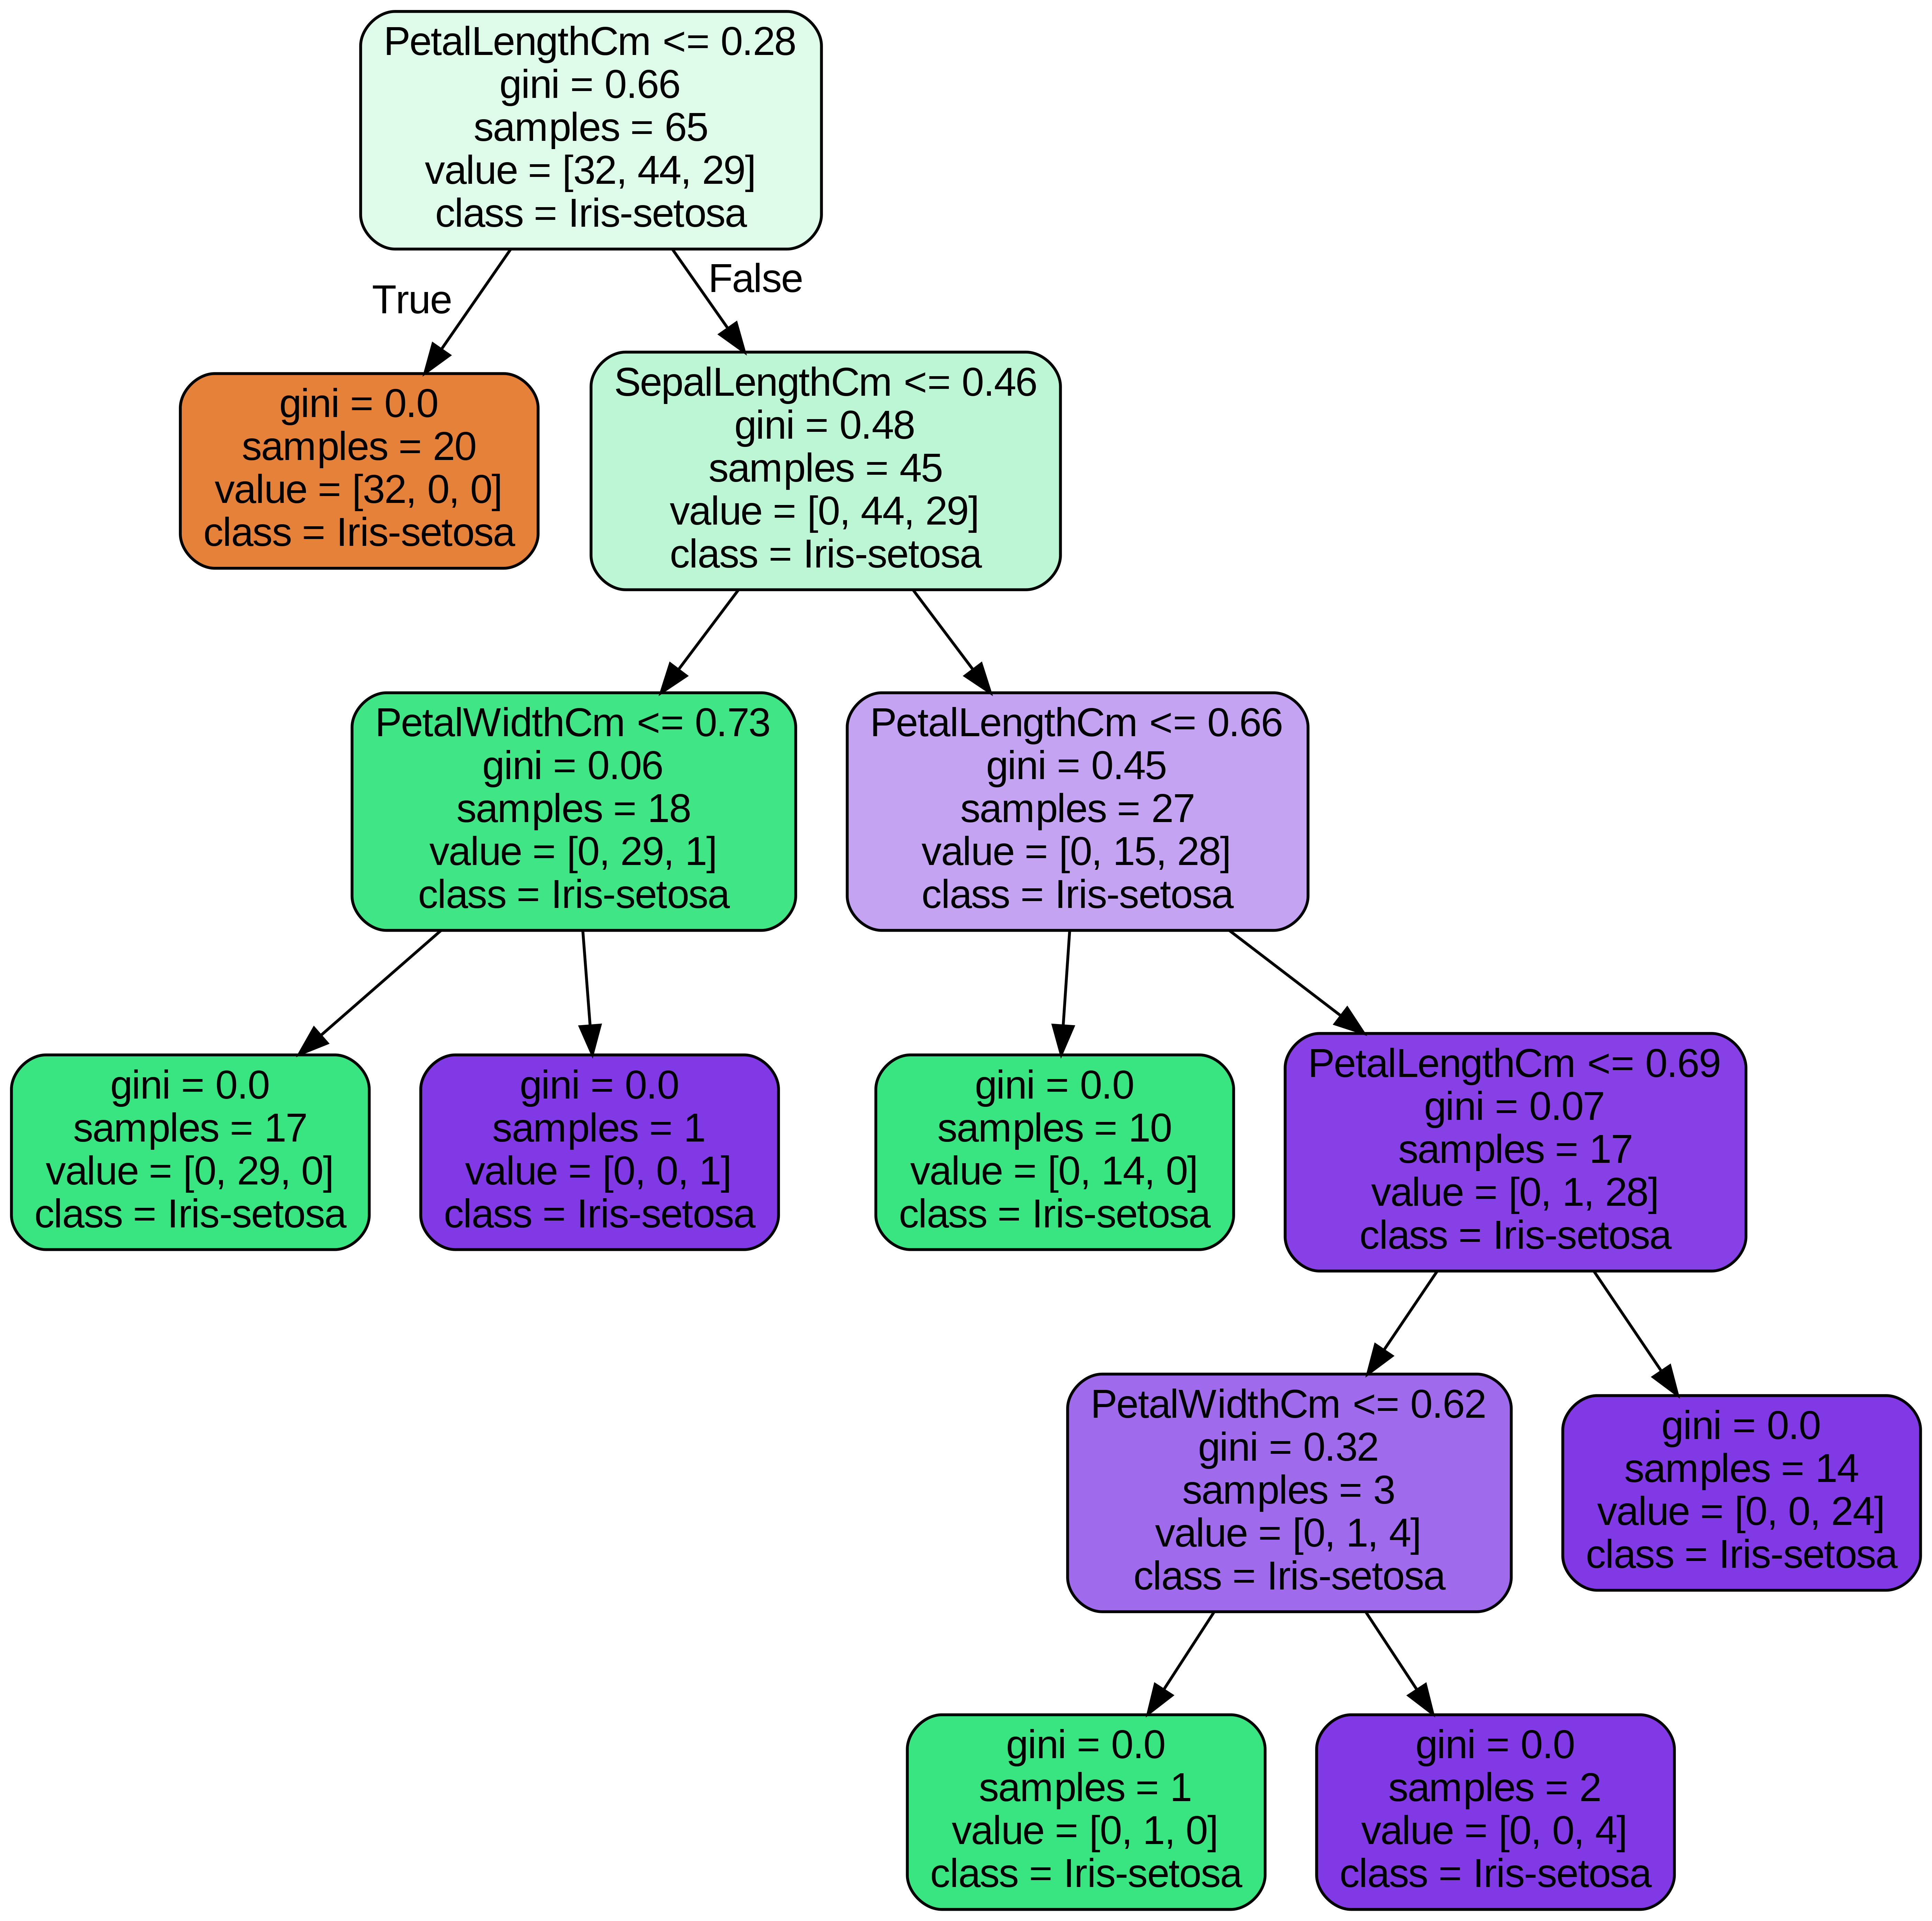

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')

**Prevendo valores com Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=200)
# Realizando o treinamento
modelDT = classifier.fit(X_train, Y_train)

In [ ]:
# Verificando a eficiência com os dados de teste
DTScore = modelDT.score(X_test, Y_test)
acc_test.append(DTScore)
DTScore

0.9555555555555556

In [ ]:
DTYPredicted = modelDT.predict(X_test)
# Matriz de confusão
confusion_matrix(Y_test, DTYPredicted)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

In [ ]:
printMetrics(Y_test, DTYPredicted)

F1 Score: 0.9511784511784512
Precision: 0.9511784511784512
Recall: 0.9511784511784512


In [ ]:
# Imprimindo registros, sua classe real e a classe determinada por Regressão Logística
printResultPrediction(X_test, Y_test, DTYPredicted)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.583333,0.363636,0.807018,0.833333
1,0.138889,0.636364,0.105263,0.041667
2,0.944444,0.272727,1.035088,0.916667
3,0.388889,1.090909,0.087719,0.125000
4,0.555556,0.318182,0.684211,0.708333
5,0.944444,0.454545,0.894737,0.916667
6,0.250000,0.954545,0.087719,0.000000
7,0.166667,0.454545,0.070175,0.041667
8,0.611111,0.454545,0.789474,0.708333
9,0.138889,0.454545,0.070175,0.083333


**Prevendo valores com K-Nearest-Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
# Realizando o treinamento
knn = KNeighborsClassifier(n_neighbors = 3)
modelKNN = knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
# Verificando a acurácia do modelo K-Nearest-Neighbors
KNNScore = modelKNN.score(X_test, Y_test)
acc_test.append(KNNScore)
KNNScore

0.9777777777777777

In [ ]:
KNNYPredicted = modelKNN.predict(X_test)

# Imprimindo a matriz de confusão
confusion_matrix(Y_test, KNNYPredicted)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

In [ ]:
printMetrics(Y_test, KNNYPredicted)

F1 Score: 0.975983436853002
Precision: 0.9722222222222222
Recall: 0.9814814814814815


In [ ]:
# Imprimindo registros, sua classe real e a classe determinada por Regressão Logística
printResultPrediction(X_test, Y_test, KNNYPredicted)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.583333,0.363636,0.807018,0.833333
1,0.138889,0.636364,0.105263,0.041667
2,0.944444,0.272727,1.035088,0.916667
3,0.388889,1.090909,0.087719,0.125000
4,0.555556,0.318182,0.684211,0.708333
5,0.944444,0.454545,0.894737,0.916667
6,0.250000,0.954545,0.087719,0.000000
7,0.166667,0.454545,0.070175,0.041667
8,0.611111,0.454545,0.789474,0.708333
9,0.138889,0.454545,0.070175,0.083333


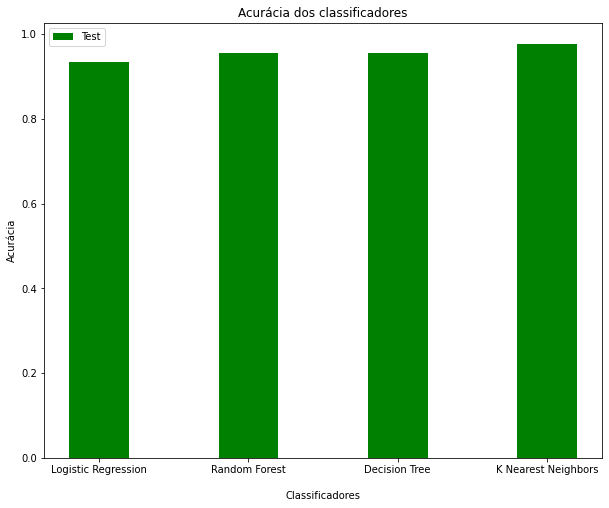

In [ ]:
eX = ['Logistic Regression', 'Random Forest', 'Decision Tree' , 'K Nearest Neighbors']
  
eixoX = np.arange(len(eX))
plt.figure(figsize=(10, 8))
plt.bar(eixoX, acc_test, 0.4, label = 'Test', color='green')
  
plt.xticks(eixoX, eX)
plt.xlabel("Classificadores", labelpad=16)
plt.ylabel("Acurácia")
plt.title("Acurácia dos classificadores")
plt.legend(loc='best')
plt.show()

In [ ]:
# Chamando a função do gráfico interativo
configure_plotly_browser_state()

# Criando valores do eixo X
eixo_x = ['Logistic Regression', 'Random Forest', 'Decision Tree' , 'K Nearest Neighbors']

# Plotando o gráfico
dados_test = go.Bar(
    # Eixo x recebe o nome dos classificadores
    x = eixo_x,
    # Eixo y recebe os valores de acurácia
    y = acc_test,
    # Define o nome
    name = 'Conjunto de Treino',
)

# Alterando configurações de Layout do Gráfico
layout = go.Layout(
    # Define Título
    title = 'Acurácia dos Classificadores',
    # Define o nome do eixo X
    xaxis = {'title': 'Classificadores'},
    # Define o nome do eixo Y
    yaxis = {'title':'Acurácia'},
    # Define a cor da borda e contorno do gráfico
    paper_bgcolor='rgba(245, 246, 249, 1)',
    # Define a cor do fundo do gráfico
    plot_bgcolor='rgba(245, 246, 249, 1)'
)

# Plotando
dataG = [dados_test]
fig = go.Figure(data=dataG, layout=layout)
py.iplot(fig)
plt.show()

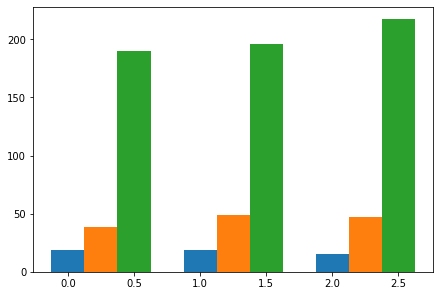

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
   # ax.bar_label(rects*/, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.show()